## Manufacture Order Durable Goods Time Series

In [ ]:
!pip install alpha_vantage
!pip install prophet
!pip install --upgrade statsmodels
!pip install prophet

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local library

In [ ]:
try:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Insert the directory to syspath
    import sys
    sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')
except:
    pass

In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model,\
                          load_hyperparam, save_hyperparam

## Manufacture new orders of durable goods

In [ ]:
suffix = 'manufacture_order_durable_goods'

In [ ]:
import requests

In [ ]:
api_key = None
try:
    with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
        api_key = f.readline()
except:
    api_key = os.environ['ALPHAVANTAGE_API_KEY']

In [ ]:
url = f"https://www.alphavantage.co/query?function=DURABLES&apikey={api_key}"
r = requests.get(url)

In [ ]:
data = r.json()
print(data)

{'name': 'Manufacturer New Orders: Durable Goods', 'interval': 'monthly', 'unit': 'millions of dollars', 'data': [{'date': '2022-03-01', 'value': '308600'}, {'date': '2022-02-01', 'value': '265197'}, {'date': '2022-01-01', 'value': '260087'}, {'date': '2021-12-01', 'value': '281341'}, {'date': '2021-11-01', 'value': '257601'}, {'date': '2021-10-01', 'value': '259457'}, {'date': '2021-09-01', 'value': '271323'}, {'date': '2021-08-01', 'value': '265120'}, {'date': '2021-07-01', 'value': '240387'}, {'date': '2021-06-01', 'value': '276422'}, {'date': '2021-05-01', 'value': '247305'}, {'date': '2021-04-01', 'value': '246489'}, {'date': '2021-03-01', 'value': '279768'}, {'date': '2021-02-01', 'value': '236976'}, {'date': '2021-01-01', 'value': '222873'}, {'date': '2020-12-01', 'value': '242573'}, {'date': '2020-11-01', 'value': '222229'}, {'date': '2020-10-01', 'value': '233711'}, {'date': '2020-09-01', 'value': '236648'}, {'date': '2020-08-01', 'value': '219612'}, {'date': '2020-07-01', 'va

In [ ]:
df3 = pd.DataFrame(data['data'])
df3.head()

date   value
0  2022-03-01  308600
1  2022-02-01  265197
2  2022-01-01  260087
3  2021-12-01  281341
4  2021-11-01  257601

In [ ]:
df3.dtypes

date     object
value    object
dtype: object

In [ ]:
df3.date = pd.to_datetime(df3.date)
df3.rename(columns={'value': 'Million_dollars'}, inplace=True)
df3['Million_dollars'] = df3['Million_dollars'].astype(int)
df3.dtypes

date               datetime64[ns]
Million_dollars             int64
dtype: object

In [ ]:
df3.tail()

date  Million_dollars
357 1992-06-01           131268
358 1992-05-01           122274
359 1992-04-01           123268
360 1992-03-01           129309
361 1992-02-01           118429

In [ ]:
df3 = df3.set_index('date')
df3.head()

Million_dollars
date                       
2022-03-01           308600
2022-02-01           265197
2022-01-01           260087
2021-12-01           281341
2021-11-01           257601

In [ ]:
df3.index

DatetimeIndex(['2022-03-01', '2022-02-01', '2022-01-01', '2021-12-01',
               '2021-11-01', '2021-10-01', '2021-09-01', '2021-08-01',
               '2021-07-01', '2021-06-01',
               ...
               '1992-11-01', '1992-10-01', '1992-09-01', '1992-08-01',
               '1992-07-01', '1992-06-01', '1992-05-01', '1992-04-01',
               '1992-03-01', '1992-02-01'],
              dtype='datetime64[ns]', name='date', length=362, freq=None)

Time series should be in ascending order. We need to reverse this one.

In [ ]:
df3 = df3[::-1]

In [ ]:
df3.head()

Million_dollars
date                       
1992-02-01           118429
1992-03-01           129309
1992-04-01           123268
1992-05-01           122274
1992-06-01           131268

In [ ]:
df3.index

DatetimeIndex(['1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
               '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01',
               '1992-10-01', '1992-11-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=362, freq=None)

<AxesSubplot:xlabel='date'>

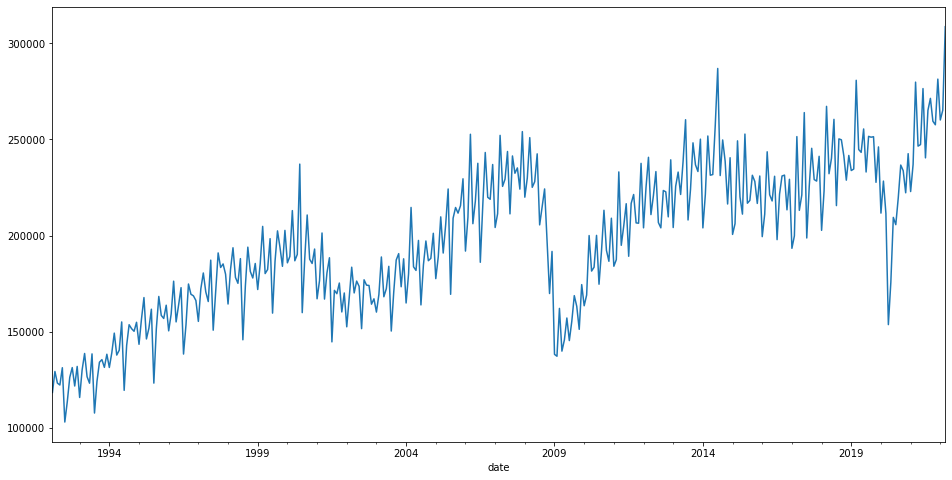

In [ ]:
df3.Million_dollars.plot(figsize=(16,8))

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,12,1)
test_dataset_end = datetime(2022,5,11)

In [ ]:
train_data = df3[:train_dataset_end]
test_data = df3[train_dataset_end+timedelta(days=30):test_dataset_end]

In [ ]:
prediction_length = len(test_data)

Save train and test data to local filesystem

In [ ]:
train_data_filename = f'train_data_{suffix}.csv'
test_data_filename = f'test_data_{suffix}.csv'

In [ ]:
train_data.to_csv(train_data_filename, encoding='utf-8')
test_data.to_csv(test_data_filename, encoding='utf-8')

Reload train and test data from file 

In [ ]:
train_data = pd.read_csv(train_data_filename, parse_dates=['date'], index_col='date')
train_data = pd.read_csv(train_data_filename, parse_dates=['date'], index_col='date')

In [ ]:
train2_data = train_data[:-(prediction_length)]
val_data = train_data[-(prediction_length):]

In [ ]:
prediction_length, len(val_data), len(train_data), len(train2_data)

(15, 15, 347, 332)

In [ ]:
test_data

Million_dollars
date                       
2021-01-01           222873
2021-02-01           236976
2021-03-01           279768
2021-04-01           246489
2021-05-01           247305
2021-06-01           276422
2021-07-01           240387
2021-08-01           265120
2021-09-01           271323
2021-10-01           259457
2021-11-01           257601
2021-12-01           281341
2022-01-01           260087
2022-02-01           265197
2022-03-01           308600

In [ ]:
# Value Columns to be used in all models tuning
value_col = 'Million_dollars'

In [ ]:
# freq, and date_col for Prophet
ph_freq='MS'
ph_date_col='date'

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

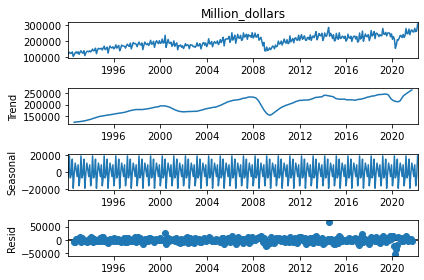

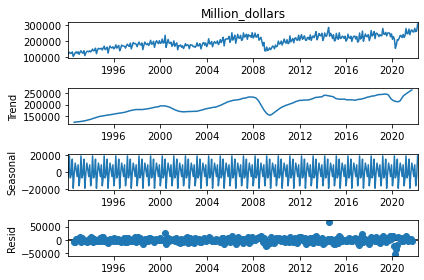

In [ ]:
seasonal_decompose(df3[value_col], model='additive', period=12).plot() # yearly

## Holt Winters Exponential Smoothing (ETS)

Find best hyperparameters using train2 and validation data. 

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_RMSE_model, best_RMSE, best_ETS_RMSE_params, best_ETS_WMAPE_model, best_WMAPE, best_ETS_WMAPE_params\
 = find_best_ETS_model(train2_data, val_data, value_col=value_col, seasonal_periods=[12, 84, 96])

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency inform

In [ ]:
best_RMSE, best_ETS_RMSE_params

(41004.33846217054, ('add', 'add', 12))

In [ ]:
best_WMAPE, best_ETS_WMAPE_params

(0.1431692508991381, ('add', 'mul', 12))

11073.033740581686, ('mul', 'add', 96)

We retrain the model using whole train data. 

In [ ]:
trend, seasonal, seasonal_period = best_ETS_RMSE_params

ETS_model_updated = ExponentialSmoothing(train_data[value_col], trend=trend, seasonal=seasonal,\
                                         seasonal_periods=seasonal_period).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
test_pred_ETS = ETS_model_updated.forecast(len(test_data))
test_pred_ETS

2021-01-01    212155.991622
2021-02-01    225044.964506
2021-03-01    254233.045219
2021-04-01    222933.611800
2021-05-01    234905.123020
2021-06-01    259829.208862
2021-07-01    230242.799780
2021-08-01    241748.073421
2021-09-01    249602.146228
2021-10-01    242206.981404
2021-11-01    228485.934454
2021-12-01    246850.379697
2022-01-01    218261.950102
2022-02-01    231150.922987
2022-03-01    260339.003700
Freq: MS, dtype: float64

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

<AxesSubplot:xlabel='date'>

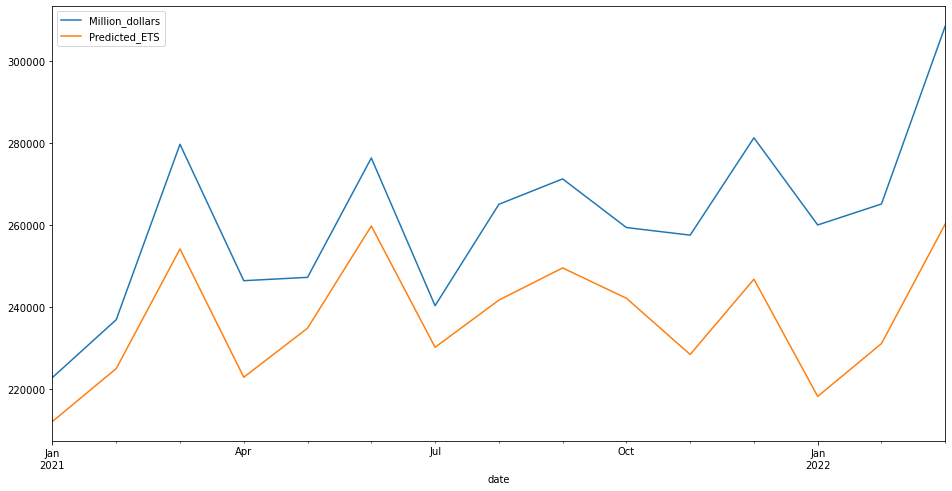

In [ ]:
test_data[[value_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA Model

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_model_filename = f"arima_{suffix}_hyper_params"

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(arima_model_filename)
except:
    pass 

In [ ]:
# # force update on hyperparameters
# best_params = None 

We search for best hyperparameters with train2 and validation data.

In [ ]:
best_ARIMA_RMSE_model, best_RMSE, best_pdq_RMSE, best_ARIMA_WMAPE_model, best_WMAPE, best_pdq_WMAPE\
  = find_best_ARIMA_model(train2_data, val_data, value_col=value_col, best_params=best_params)

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmod

In [ ]:
best_pdq_RMSE, best_RMSE

((5, 0, 4), 26332.668849298127)

In [ ]:
# save best hyperparam to file 
save_hyperparam(arima_model_filename, best_pdq_RMSE)

In [ ]:
best_pdq_WMAPE, best_WMAPE

((5, 0, 4), 0.08183260503432276)

In [ ]:
best_pdq = best_pdq_RMSE # for SARIMAX below
best_ARIMA_model = best_ARIMA_RMSE_model

best_pdq, best_RMSE = (0, 1, 6), 16405.7445524835

We update the model with full train data.

In [ ]:
model_ARIMA = ARIMA(train_data[value_col], order=best_pdq_RMSE).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test_pred_arima = model_ARIMA.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

<AxesSubplot:xlabel='date'>

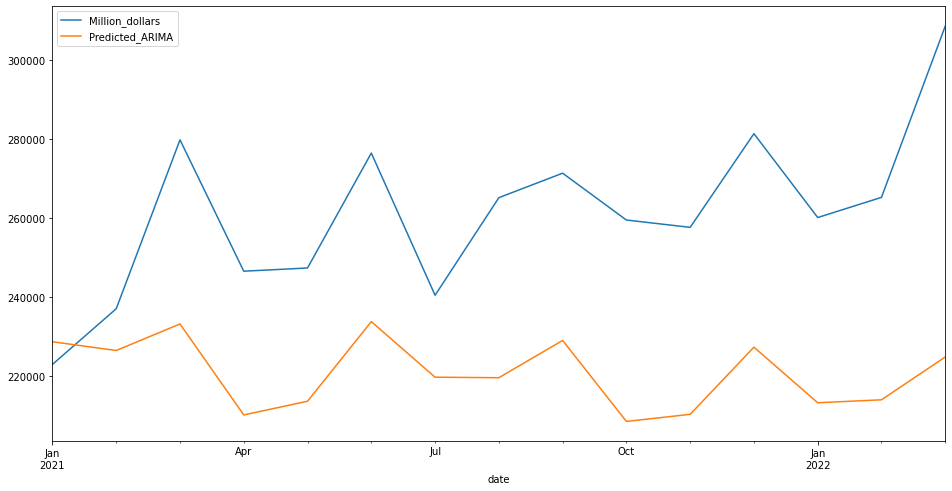

In [ ]:
test_data[[value_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

## SARIMAX model

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
sarimax_model_filename = f"sarimax_{suffix}_hyper_params"

In [ ]:
# run once then comment oute 
# best_params = (1, 0, 1, 96)
# save_hyperparam(sarimax_model_filename, best_params)

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(sarimax_model_filename)
except:
    pass 

In [ ]:
# we get best pdq from ARIMA (=best_pdq) and seaonal_period from ETS best params
seasonal_period = best_ETS_RMSE_params[2]

In [ ]:
# # force hyperparameters search 
# best_params = None 

We find hyperparameters with train2 and validation data.

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQS = find_best_SARIMAX_model(train2_data, val_data, best_pdq_RMSE, \
                                                                  value_col=value_col, season_period=seasonal_period,\
                                                                   best_params=best_params)

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43119D+02    |proj g|=  3.54806D+02

At iterate    5    f=  1.34257D+01    |proj g|=  4.58046D+00

At iterate   10    f=  1.20960D+01    |proj g|=  4.50382D+00

At iterate   15    f=  1.13480D+01    |proj g|=  6.20328D-01

At iterate   20    f=  1.09492D+01    |proj g|=  2.75201D+00

At iterate   25    f=  1.08815D+01    |proj g|=  1.32871D-01

At iterate   30    f=  1.08801D+01    |proj g|=  1.79284D-01

At iterate   35    f=  1.08787D+01    |proj g|=  2.58905D-02

At iterate   40    f=  1.08774D+01    |proj g|=  2.88523D-01

At iterate   45    f=  1.08731D+01    |proj g|=  1.46357D-01

At iterate   50    f=  1.08723D+01    |proj g|=  8.63690D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24321D+01    |proj g|=  1.11158D+02

At iterate    5    f=  1.31619D+01    |proj g|=  4.69203D+00

At iterate   10    f=  1.19365D+01    |proj g|=  3.98553D+00

At iterate   15    f=  1.15496D+01    |proj g|=  7.74638D+00

At iterate   20    f=  1.09961D+01    |proj g|=  1.73794D+00

At iterate   25    f=  1.08842D+01    |proj g|=  4.81705D-01

At iterate   30    f=  1.08452D+01    |proj g|=  1.33095D-01

At iterate   35    f=  1.08412D+01    |proj g|=  4.61572D-02

At iterate   40    f=  1.08385D+01    |proj g|=  3.37365D-03

At iterate   45    f=  1.08383D+01    |proj g|=  2.38187D-02


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  1.08368D+01    |proj g|=  8.11313D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   8.113D-02   1.084D+01
  F =   10.836846011650367     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05463D+01    |proj g|=  9.99645D+01


 This problem is unconstrained.



At iterate    5    f=  1.25927D+01    |proj g|=  4.31271D+00

At iterate   10    f=  1.15992D+01    |proj g|=  9.24413D+00

At iterate   15    f=  1.11128D+01    |proj g|=  5.62070D-01

At iterate   20    f=  1.10310D+01    |proj g|=  9.08998D-02

At iterate   25    f=  1.10113D+01    |proj g|=  6.81123D-01

At iterate   30    f=  1.09970D+01    |proj g|=  5.07814D-02

At iterate   35    f=  1.09745D+01    |proj g|=  1.90001D-01

At iterate   40    f=  1.09249D+01    |proj g|=  1.41329D+00

At iterate   45    f=  1.07989D+01    |proj g|=  1.94654D-01


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.07932D+01    |proj g|=  1.85576D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     74      1     0     0   1.856D-02   1.079D+01
  F =   10.793170145366696     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05305D+01    |proj g|=  1.71905D-01

At iterate    5    f=  1.05095D+01    |proj g|=  1.80521D-02

At iterate   10    f=  1.04937D+01    |proj g|=  1.94175D-02

At iterate   15    f=  1.04911D+01    |proj g|=  1.28961D-02

At iterate   20    f=  1.04898D+01    |proj g|=  7.02390D-03

At iterate   25    f=  1.04855D+01    |proj g|=  3.68430D-02

At iterate   30    f=  1.04814D+01    |proj g|=  7.96383D-02

At iterate   35    f=  1.04779D+01    |proj g|=  1.93763D-02

At iterate   40    f=  1.04753D+01    |proj g|=  1.02815D-01

At iterate   45    f=  1.04741D+01    |proj g|=  4.70971D-02


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  1.04731D+01    |proj g|=  4.42602D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   4.426D-02   1.047D+01
  F =   10.473109998827452     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04878D+01    |proj g|=  2.68712D-01

At iterate    5    f=  1.03802D+01    |proj g|=  1.57743D-02

At iterate   10    f=  1.03717D+01    |proj g|=  9.61883D-03

At iter

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03583D+01    |proj g|=  2.84717D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   2.847D-03   1.036D+01
  F =   10.358340066794190     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04976D+01    |proj g|=  2.75676D-01


 This problem is unconstrained.



At iterate    5    f=  1.03848D+01    |proj g|=  3.85986D-02

At iterate   10    f=  1.03724D+01    |proj g|=  1.25596D-02

At iterate   15    f=  1.03705D+01    |proj g|=  1.01840D-02

At iterate   20    f=  1.03650D+01    |proj g|=  1.91370D-02

At iterate   25    f=  1.03619D+01    |proj g|=  1.07796D-02

At iterate   30    f=  1.03594D+01    |proj g|=  1.06256D-02

At iterate   35    f=  1.03570D+01    |proj g|=  7.11642D-03

At iterate   40    f=  1.03568D+01    |proj g|=  1.59744D-03

At iterate   45    f=  1.03568D+01    |proj g|=  1.05011D-04


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03568D+01    |proj g|=  2.82071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     55      1     0     0   2.821D-04   1.036D+01
  F =   10.356778533501775     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43119D+02    |proj g|=  3.54806D+02

At iterate    5    f=  1.55756D+01    |proj g|=  9.55488D+01

At iterate   10    f=  1.19380D+01    |proj g|=  5.96224D+00

At iterate   15    f=  1.09892D+01    |proj g|=  8.89361D-01

At iterate   20    f=  1.09157D+01    |proj g|=  4.90207D-01

At iterate   25    f=  1.08648D+01    |proj g|=  4.09686D-01

At iterate   30    f=  1.08584D+01    |proj g|=  1.51263D-02

At iterate   35    f=  1.08568D+01    |proj g|=  1.38928D-01

At iterate   40    f=  1.08551D+01    |proj g|=  9.77001D-02

At iterate   45    f=  1.08511D+01    |proj g|=  7.10403D-02

At iterate   50    f=  1.08500D+01    |proj g|=  1.99309D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86282D+02    |proj g|=  4.56013D+02

At iterate    5    f=  1.13631D+01    |proj g|=  1.06832D+00

At iterate   10    f=  1.09057D+01    |proj g|=  9.74494D-01

At iterate   15    f=  1.07521D+01    |proj g|=  1.70855D-01

At iterate   20    f=  1.07235D+01    |proj g|=  2.47464D-02

At iterate   25    f=  1.07087D+01    |proj g|=  5.82328D-02

At iterate   30    f=  1.06836D+01    |proj g|=  5.75631D-02

At iterate   35    f=  1.06805D+01    |proj g|=  1.23307D-02

At iterate   40    f=  1.06797D+01    |proj g|=  2.11715D-02

At iterate   45    f=  1.06792D+01    |proj g|=  3.68055D-02


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  1.06788D+01    |proj g|=  4.11361D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     62      1     0     0   4.114D-03   1.068D+01
  F =   10.678758425400842     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13338D+02    |proj g|=  1.85196D+03


 This problem is unconstrained.



At iterate    5    f=  1.49914D+01    |proj g|=  2.48360D+01

At iterate   10    f=  1.37351D+01    |proj g|=  6.61909D+00

At iterate   15    f=  1.09344D+01    |proj g|=  4.10528D-01

At iterate   20    f=  1.07933D+01    |proj g|=  1.07222D-01

At iterate   25    f=  1.07540D+01    |proj g|=  1.75784D-01

At iterate   30    f=  1.07001D+01    |proj g|=  1.55488D-01

At iterate   35    f=  1.06836D+01    |proj g|=  2.17770D-02

At iterate   40    f=  1.06792D+01    |proj g|=  4.23832D-02

At iterate   45    f=  1.06752D+01    |proj g|=  1.31317D-02


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.06741D+01    |proj g|=  8.39162D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     53      1     0     0   8.392D-03   1.067D+01
  F =   10.674101706106677     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05074D+01    |proj g|=  3.35335D-01

At iterate    5    f=  1.04163D+01    |proj g|=  9.79787D-03

At iterate   10    f=  1.04150D+01    |proj g|=  8.78124D-04

At iterate   15    f=  1.04150D+01    |proj g|=  2.58002D-04

At iterate   20    f=  1.04149D+01    |proj g|=  5.50014D-03

At iterate   25    f=  1.04146D+01    |proj g|=  7.43790D-03

At iterate   30    f=  1.04144D+01    |proj g|=  3.12546D-03

At iterate   35    f=  1.04143D+01    |proj g|=  1.04738D-03

At iterate   40    f=  1.04143D+01    |proj g|=  1.04160D-03

At iterate   45    f=  1.04143D+01    |proj g|=  1.65150D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.04143D+01    |proj g|=  1.02628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     55      1     0     0   1.026D-03   1.041D+01
  F =   10.414268071361425     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04879D+01    |proj g|=  2.74698D-01

At iterate    5    f=  1.03899D+01    |proj g|=  5.10623D-02

At iterate   10    f=  1.03735D+01    |proj g|=  1.23360D-02

At iterate   15    f=  1.03711D+01    |proj g|=  6.36346D-03

At iterate   20    f=  1.03666D+01    |proj g|=  1.68493D-02

At iterate   25    f=  1.03633D+01    |proj g|=  1.36464D-02

At iterate   30    f=  1.03601D+01    |proj g|=  1.39745D-02

At iterate   35    f=  1.03579D+01    |proj g|=  6.93685D-03

At iterate   40    f=  1.03565D+01    |proj g|=  1.47043D-03

At iterate   45    f=  1.03565D+01    |proj g|=  1.20422D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03565D+01    |proj g|=  1.11006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     53      1     0     0   1.110D-04   1.036D+01
  F =   10.356491082708249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04965D+01    |proj g|=  2.74023D-01


 This problem is unconstrained.



At iterate    5    f=  1.03797D+01    |proj g|=  3.64270D-02

At iterate   10    f=  1.03718D+01    |proj g|=  1.07915D-02

At iterate   15    f=  1.03685D+01    |proj g|=  3.52084D-02

At iterate   20    f=  1.03641D+01    |proj g|=  3.84169D-02

At iterate   25    f=  1.03610D+01    |proj g|=  5.30009D-03

At iterate   30    f=  1.03583D+01    |proj g|=  1.03907D-02

At iterate   35    f=  1.03580D+01    |proj g|=  1.08761D-03

At iterate   40    f=  1.03578D+01    |proj g|=  1.99720D-03

At iterate   45    f=  1.03577D+01    |proj g|=  2.86144D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03572D+01    |proj g|=  6.60431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     53      1     0     0   6.604D-03   1.036D+01
  F =   10.357204591236794     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43119D+02    |proj g|=  3.54806D+02

At iterate    5    f=  1.24483D+01    |proj g|=  3.97042D+01

At iterate   10    f=  1.08337D+01    |proj g|=  1.52201D+00

At iterate   15    f=  1.07692D+01    |proj g|=  6.88479D-01

At iterate   20    f=  1.07589D+01    |proj g|=  8.91039D-02

At iterate   25    f=  1.07476D+01    |proj g|=  4.34177D-01

At iterate   30    f=  1.07312D+01    |proj g|=  3.04742D-01

At iterate   35    f=  1.07137D+01    |proj g|=  6.98514D-02

At iterate   40    f=  1.07125D+01    |proj g|=  4.42072D-03

At iterate   45    f=  1.07124D+01    |proj g|=  4.34288D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.07124D+01    |proj g|=  3.48663D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   3.487D-03   1.071D+01
  F =   10.712427532953672     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54661D+02    |proj g|=  3.82176D+02

At iterate    5    f=  1.27052D+01    |proj g|=  5.61750D+00

At iterate   10    f=  1.08714D+01    |proj g|=  2.68291D-01

At iterate   15    f=  1.07814D+01    |proj g|=  1.25133D-01

At iterate   20    f=  1.07325D+01    |proj g|=  1.29318D-01

At iterate   25    f=  1.07238D+01    |proj g|=  8.81916D-02

At iterate   30    f=  1.07049D+01    |proj g|=  1.00453D-01

At iterate   35    f=  1.06873D+01    |proj g|=  3.00045D-02

At iterate   40    f=  1.06801D+01    |proj g|=  7.52528D-03

At iterate   45    f=  1.06774D+01    |proj g|=  6.26412D-02


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.06756D+01    |proj g|=  2.60341D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     60      1     0     0   2.603D-02   1.068D+01
  F =   10.675608800036256     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57554D+02    |proj g|=  1.27166D+03

At iterate    5    f=  1.43222D+01    |proj g|=  4.92614D+01

At iterate   10    f=  1.25792D+01    |proj g|=  4.24808D+00

At iterate   15    f=  1.07989D+01    |proj g|=  1.84427D-01

At iterate   20    f=  1.07272D+01    |proj g|=  1.56073D-01

At iterate   25    f=  1.07148D+01    |proj g|=  9.39058D-02

At iterate   30    f=  1.06907D+01    |proj g|=  4.26316D-02

At iterate   35    f=  1.06788D+01    |proj g|=  4.67522D-02

At iterate   40    f=  1.06755D+01    |proj g|=  1.40586D-02

At iterate   45    f=  1.06736D+01    |proj g|=  2.78581D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.06733D+01    |proj g|=  3.52553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     55      1     0     0   3.526D-03   1.067D+01
  F =   10.673326574885424     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05140D+01    |proj g|=  4.02484D-01


 This problem is unconstrained.



At iterate    5    f=  1.04012D+01    |proj g|=  1.91760D-02

At iterate   10    f=  1.03989D+01    |proj g|=  1.31677D-03

At iterate   15    f=  1.03989D+01    |proj g|=  6.03623D-04

At iterate   20    f=  1.03989D+01    |proj g|=  1.64472D-04

At iterate   25    f=  1.03989D+01    |proj g|=  9.11106D-04

At iterate   30    f=  1.03989D+01    |proj g|=  1.22454D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     31     36      1     0     0   1.067D-04   1.040D+01
  F =   10.398899792546858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04997D+01    |proj g|=  3.52536D-01


 This problem is unconstrained.



At iterate    5    f=  1.03901D+01    |proj g|=  3.29447D-02

At iterate   10    f=  1.03733D+01    |proj g|=  1.44434D-02

At iterate   15    f=  1.03712D+01    |proj g|=  7.52317D-03

At iterate   20    f=  1.03658D+01    |proj g|=  2.53876D-02

At iterate   25    f=  1.03627D+01    |proj g|=  1.11578D-02

At iterate   30    f=  1.03590D+01    |proj g|=  8.01034D-03

At iterate   35    f=  1.03560D+01    |proj g|=  9.10485D-03

At iterate   40    f=  1.03557D+01    |proj g|=  2.59865D-03

At iterate   45    f=  1.03556D+01    |proj g|=  2.85930D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03556D+01    |proj g|=  4.12183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     57      1     0     0   4.122D-04   1.036D+01
  F =   10.355582251672509     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05002D+01    |proj g|=  3.05179D-01


 This problem is unconstrained.



At iterate    5    f=  1.03804D+01    |proj g|=  3.34966D-02

At iterate   10    f=  1.03717D+01    |proj g|=  1.53185D-02

At iterate   15    f=  1.03703D+01    |proj g|=  1.73087D-02

At iterate   20    f=  1.03640D+01    |proj g|=  2.52007D-02

At iterate   25    f=  1.03609D+01    |proj g|=  1.77463D-02

At iterate   30    f=  1.03579D+01    |proj g|=  2.10288D-02

At iterate   35    f=  1.03554D+01    |proj g|=  4.89895D-03

At iterate   40    f=  1.03553D+01    |proj g|=  1.12838D-03

At iterate   45    f=  1.03552D+01    |proj g|=  1.28212D-03


/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.03552D+01    |proj g|=  2.00775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     54      1     0     0   2.008D-03   1.036D+01
  F =   10.355201412331491     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [ ]:
best_RMSE, best_PDQS

(27472.330578905792, (0, 0, 0, 12))

In [ ]:
# save best hyperparam to file 
save_hyperparam(sarimax_model_filename, best_PDQS)

best_RMSE, best_PDQS

(15490.750309465157, (1, 0, 1, 96))

We train model with full train data.

In [ ]:
model_SARIMAX = SARIMAX(train_data[value_col], order=best_pdq_RMSE, seasonal_order=best_PDQS).fit()

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01603D+02    |proj g|=  2.34410D+02

At iterate    5    f=  1.19048D+01    |proj g|=  3.12061D+00

At iterate   10    f=  1.13117D+01    |proj g|=  3.55917D-01

At iterate   15    f=  1.09901D+01    |proj g|=  1.59624D-01

At iterate   20    f=  1.09572D+01    |proj g|=  1.64108D-01

At iterate   25    f=  1.09425D+01    |proj g|=  6.06350D-01

At iterate   30    f=  1.09329D+01    |proj g|=  1.77341D+00

At iterate   35    f=  1.09182D+01    |proj g|=  4.91993D-01

At iterate   40    f=  1.09103D+01    |proj g|=  7.82219D-01

At iterate   45    f=  1.09079D+01    |proj g|=  2.86747D-01

At iterate   50    f=  1.09060D+01    |proj g|=  3.49282D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/wismin/miniconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred_test_SARIMAX = model_SARIMAX.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_SARIMAX'] = pred_test_SARIMAX

<AxesSubplot:xlabel='date'>

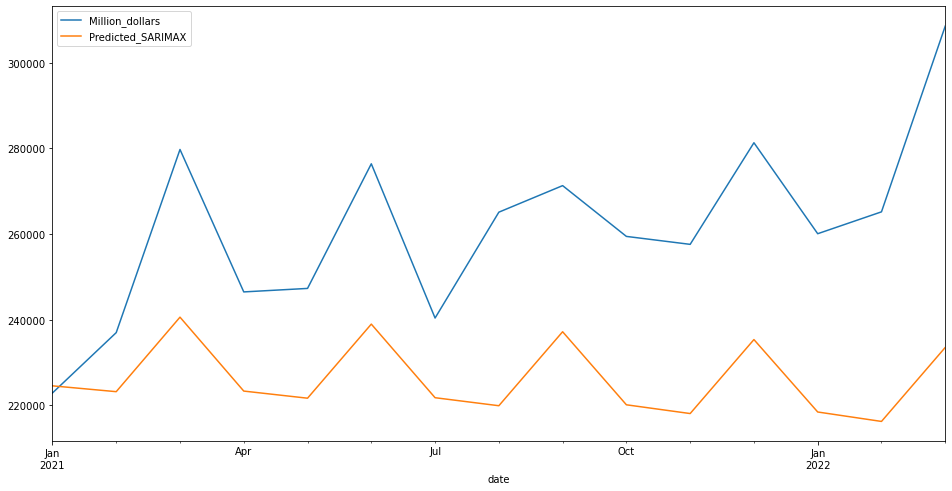

In [ ]:
test_data[[value_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Prophet

In [ ]:
from prophet import Prophet

In [ ]:
proph_train2, proph_val = create_proph_train_test(train2_data, val_data, date_col=ph_date_col, value_col=value_col)
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col=ph_date_col, value_col=value_col)

In [ ]:
prophet_model_filename = f"prophet_{suffix}_hyper_params"

In [ ]:
# run once then commented out
# best_params = (0.9, 0.05, 2, 'additive')
# save_hyperparam(prophet_model_filename, best_params)

In [ ]:
best_params = None 
try:
    best_params = load_hyperparam(prophet_model_filename)
except:
    pass 

In [ ]:
# # force hyperparameters search
# best_params = None 

Find the best hyperparameters with train2 and validation data.

In [ ]:
best_Prophet_RMSE_model, best_RMSE, best_Prophet_RMSE_params, \
best_Prophet_WMAPE_model, best_WMAPE, best_Prophet_WMAPE_params, \
  = find_best_Prophet_model(proph_train2, proph_val, val_data, value_col=value_col,freq=ph_freq,\
                            best_params=best_params)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       744.301   0.000809298       123.903   5.814e-06       0.001      123  LS failed, Hessian reset 
      99       744.626   9.37388e-05       62.9501      0.2839      0.9955      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       744.883    0.00065581       80.6693   6.675e-06       0.001      247  LS failed, Hessian reset 
     182       744.978   3.96644e-08       62.5521           1           1      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.994569844898659
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       745.558   7.16371e-05       72.5228      0.5695      0.5695      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       745.843     0.0011819       99.5628   1.321e-05       0.001      208  LS failed, Hessian reset 
     171       745.927   2.86112e-08       65.3874        0.32        0.32      288   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.028705799152738
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       745.282   2.16961e-05       71.6682      0.5477      0.5477      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       745.591    5.9692e-08       67.0331           1           1      208   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.014950328041511
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       746.695    0.00104202       127.318    1.11e-05       0.001      156  LS failed, Hessian reset 
      99       746.804   1.33942e-06       67.0694       0.159       0.159      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       746.898   5.49548e-06        76.917      0.6676      0.6676      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       746.899   3.53001e-08       67.5301           1           1      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.071451080737864
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       745.069   0.000947151       132.633   9.346e-06       0.001      130  LS failed, Hessian reset 
      99       745.153   5.90539e-05        75.478           1           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       745.361   0.000966173       157.827   8.529e-06       0.001      220  LS failed, Hessian reset 
     194       745.493    1.7498e-08       66.8641      0.3189      0.3189      318   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.9933048086630945
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       746.825   2.25824e-05       76.0639      0.2166      0.8237      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       746.857   0.000295283       79.5349   3.172e-06       0.001      182  LS failed, Hessian reset 
     199       747.061   5.15073e-06       71.4175      0.6726      0.6726      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       747.062   1.01993e-07       76.3741    1.57e-09       0.001      363  LS failed, Hessian reset 
     229       747.062   5.32785e-09       65.0566      0.1133      0.3298      369   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.0543597012074564
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.935    0.00267732       36.1988       0.913       0.913      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       763.525     0.0579017       196.156           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       769.574    0.00219183       69.4638      0.3359           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       772.697   0.000363276       73.4008   6.333e-06       0.001      492  LS failed, Hessian reset 
     399       774.887    0.00162482       126.482      0.4302      0.4302      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8171332724623521
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       761.379    0.00737708       44.4709      0.6654      0.6654      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       769.604    0.00818047       70.8645           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       772.131    0.00670196       56.2221      0.2925      0.2925      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       774.309   0.000399082        42.106   2.044e-06       0.001      438  LS failed, Hessian reset 
     399        777.61   0.000314617       32.4987      0.9207      0.9207      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8485759309532
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.098      0.039533       200.834           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       763.304    0.00362714       43.6404      0.6739      0.6739      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       770.989    0.00156441        57.736           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       773.578   0.000202352          49.2   3.483e-06       0.001      487  LS failed, Hessian reset 
     399       774.292    0.00443957       101.643           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8250601243689655
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       761.283     0.0130027       83.7315           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       769.923     0.0467337       98.9506           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       774.385   0.000465289       64.4241      0.5236      0.5236      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       777.538   0.000309636       67.8428   2.512e-06       0.001      443  LS failed, Hessian reset 
     399       779.403    0.00680771       33.5314      0.1592           1      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.876494613815958
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.407    0.00301234       145.179      0.4826      0.4826      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       763.531    0.00218023       152.551           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       765.862   0.000687235       60.9083   1.077e-05       0.001      353  LS failed, Hessian reset 
     299       767.538    0.00289438       90.2725      0.3768      0.3768      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       771.628      0.021876       71.3911           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.848922511402687
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       761.074   0.000318627       46.9663      0.6379      0.6379      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       765.471    0.00124885       116.143   2.029e-05       0.001      216  LS failed, Hessian reset 
     199       767.535    0.00222301       117.596      0.6663      0.6663      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        775.19    0.00645547       59.1327      0.1226           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       775.416   0.000197407        49.207   4.739e-06       0.001      474  LS failed, Hessian reset 
     356       775.609   0.000375862       78.5436   1.061e-05     

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8808263169127764
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       820.058     0.0153389       238.929       0.708       0.708      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       841.457     0.0209132       206.395           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       854.389    0.00484157       31.8128           1           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       861.586    0.00438939       272.336      0.3938      0.3938      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        868.13    0.00201928       65.8382      0.9516      0.9516      554   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.7533766332108962
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       816.191     0.0185744       151.326           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       848.134     0.0188557        48.798           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       858.754     0.0234069       98.8134           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       864.696     0.0252739       106.943           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       865.072   7.92841e-05       15.9727   1.374e-06       0.001      512  LS failed, Hessian reset

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.823224624824536
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       818.696      0.111292       119.633           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        843.14     0.0165736       83.4941      0.4553           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       852.481    0.00447474       45.8047      0.9792      0.9792      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       858.933    0.00792835       123.321      0.2537           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433       864.208   0.000300038        110.93   1.669e-06       0.001      527  LS failed, Hessian reset 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.7569658410541718
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        824.16      0.118909       217.323           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       848.027     0.0197305       104.495           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       860.066    0.00981874       37.6562           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       868.933     0.0186946       51.6108           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       877.216    0.00597221       26.8511           1           1      566   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8304926052255652
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       806.386     0.0432468       239.242           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       834.431     0.0277141       159.483      0.3583           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       847.032     0.0391171       72.9285           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       855.891   0.000427444        27.084        0.19        0.19      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       866.074    0.00376407       45.4949      0.9715      0.9715      553   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.7621747124492955
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       819.573     0.0219055       261.589           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       844.806     0.0508513       62.7165      0.8715      0.8715      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       855.432   0.000319724       54.8148      0.7609      0.7609      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       867.415     0.0079959       46.2057           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     496       874.465   0.000142005        62.023   1.569e-06       0.001      621  LS failed, Hessian reset

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8329030163484796
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       827.741     0.0337367       167.593           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       849.418    0.00300178       65.4733           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       874.201    0.00819647       104.395      0.7267      0.7267      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       881.175     0.0295027       103.227      0.3148      0.7544      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       891.322     0.0251654       169.277           1           1      557   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.74775200958669
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       841.206     0.0401449        111.46           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       865.294    0.00466368        214.34       0.194       0.194      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       882.783    0.00546042       96.6307           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       896.249     0.0230097       59.3787           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       903.293    0.00625486       37.1851       3.955      0.3955      572   
    Iter      log prob  

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8043308823189432
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       833.952    0.00770301       161.475      0.8448      0.8448      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       865.081    0.00367545       78.6093      0.6661      0.6661      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       876.543     0.0078126       96.9515           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       884.948    0.00148743       30.9815      0.7921      0.7921      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       893.598    0.00314228       82.1483           1           1      550   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.7512913769926752
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       846.234    0.00410558       85.7556           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       879.964     0.0245926       114.084           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       891.436    0.00912648       151.724           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       903.048      0.014177       85.0011           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       905.636   0.000245376       43.3601      0.1288      0.3846      574   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8203719647083374
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       824.588      0.154102        563.87      0.4966           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       854.777    0.00128889       56.0648      0.8355      0.8355      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       876.954    0.00374484       123.271      0.6703      0.6703      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       882.138     0.0230579       183.436           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       888.533    0.00282678       70.7861           1           1      560   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.7502930320808368
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       832.863      0.161608       813.751      0.6156      0.6156      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       862.181    0.00758978       88.8304      0.8921      0.8921      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       884.037    0.00881117       181.516           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       893.108     0.0221237       301.673      0.1567           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       899.537    0.00785416       131.099      0.5625      0.5625      563   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.816347806422444
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       743.674    0.00164786       184.164   1.814e-05       0.001      111  LS failed, Hessian reset 
      99       744.157    9.9544e-05       78.9588           1           1      148   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       744.776   1.84637e-06       64.8631      0.6131      0.6131      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       744.779   3.40106e-05       82.3719   3.898e-07       0.001      373  LS failed, Hessian reset 
     269       744.781   2.42946e-08       65.5747      0.2428           1      412   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.9860431677418051
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       745.584   6.75404e-05       76.8943           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       745.818   0.000535998       80.8253   6.334e-06       0.001      201  LS failed, Hessian reset 
     177       745.926   0.000155116       84.7212   1.902e-06       0.001      302  LS failed, Hessian reset 
     199       745.934   4.68255e-07       84.9568      0.1706      0.5754      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       745.947   2.01773e-07        75.875   2.606e-09       0.001      457  LS failed, Hessian reset 
     274       745.947   2.38545e-08       75.2935      0.2735           1      469   
Optimization terminated normally: 
  Convergenc

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.0527719926234216
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       745.277    0.00653522       143.799     0.09711           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       745.516     3.677e-05       68.5033   4.285e-07       0.001      265  LS failed, Hessian reset 
     197       745.518   8.02085e-09       65.7263      0.2226      0.2226      313   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.0040240630699735
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       746.077   2.02661e-05       74.1202      0.2189           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       746.728   3.25485e-05       74.6576   4.451e-07       0.001      224  LS failed, Hessian reset 
     177        746.73   2.68075e-06       85.8344   3.516e-08       0.001      297  LS failed, Hessian reset 
     194        746.73   2.14997e-08       80.0481      0.3511      0.3511      317   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.037888850579212
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       745.223   0.000315252        79.691           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       745.553   2.13894e-08       77.9958      0.1684      0.8108      220   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.021354509388741
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       746.341   7.92993e-06       77.8498      0.1847     0.01847      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131        746.66    0.00121735       105.456    1.26e-05       0.001      223  LS failed, Hessian reset 
     199        746.78   9.33633e-06       77.6055      0.5678     0.05678      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       746.782   2.96628e-07       66.8632      0.2537           1      408   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.055779981064446
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.093    0.00380925       65.3094           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       760.083   0.000560105        78.498   5.896e-06       0.001      205  LS failed, Hessian reset 
     199       761.541    0.00701988       104.623      0.5366      0.5366      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       767.003     0.0876132       87.6069           1           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       774.114   0.000560907       54.0458       0.149      0.7504      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8382877980703094
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.782   0.000419902       42.4263      0.8415      0.8415      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       764.534    0.00150152       40.1308      0.2504      0.6914      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       774.588     0.0727398       234.194           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       776.469   0.000254419       63.3882   4.412e-06       0.001      499  LS failed, Hessian reset 
     399       776.565   0.000405155       37.7796      0.5249      0.5249      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.8843125733530925
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.558    0.00154175        112.48      0.5196      0.5196      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117        758.65   0.000654224       65.2862   2.274e-05       0.001      175  LS failed, Hessian reset 
     199       767.112     0.0204695       54.6794      0.5785      0.5785      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       771.888   0.000165906       32.9007   6.106e-06       0.001      380  LS failed, Hessian reset 
     299       772.449   0.000172681       27.3911           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       773.253   3.51653e-05       29.3609           1    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.9080101782966212
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        760.95      0.121508       82.5793           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       770.696    0.00714774       185.982       1.515      0.1515      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       776.901   0.000276957       29.0262           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       778.136   0.000282653       58.5174   5.733e-06       0.001      522  LS failed, Hessian reset 
     399        778.16   9.89781e-05       25.4632      0.6118     0.06118      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.9703594390200687
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       757.128    0.00113065        71.905      0.3156      0.3156      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       759.877   0.000311444       45.3331   4.221e-06       0.001      197  LS failed, Hessian reset 
     199       762.438     0.0030358        42.301           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       764.036   0.000461224       60.3183   1.671e-05       0.001      339  LS failed, Hessian reset 
     299       766.187   0.000723808       47.4666      0.1474      0.1474      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       772.129     0.0200933       37.0428           1    

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.875547897447269
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       761.744     0.0429773        136.36           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       763.444   0.000277445       44.4026   6.244e-06       0.001      182  LS failed, Hessian reset 
     199       768.006     0.0130308       90.1628           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       777.199     0.0190664       86.5301      0.6354           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        778.26   2.16237e-06       26.2916     0.01339           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  1.954101436288655
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       809.858     0.0435895       373.339           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       834.369     0.0583914       509.105           1           1      218   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       851.696    0.00712103       107.443      0.4689      0.4689      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       860.028    0.00545572       33.2499           1           1      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       865.089    0.00225785       39.1406      0.5145      0.5145      550   
    Iter      log prob 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.7321250774493504
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       820.523     0.0167192       99.6022           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       855.175     0.0394388       204.385      0.2093           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       863.939     0.0142702       104.311           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       872.865    0.00468052       56.4919           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       875.656    0.00208204       54.0784           1           1      574   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.7473647142677984
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       793.016    0.00519409       115.428           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        850.68     0.0380212       125.603           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       866.479     0.0153811       89.4887           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       872.473     0.0251612       136.203           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     416       873.217   0.000104441       34.9961   4.137e-06       0.001      503  LS failed, Hessian reset

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.7118613313975706
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       815.885     0.0458677       236.816           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       857.972    0.00357268        70.146           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       864.027      0.023586       538.186           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       874.818    0.00167102       44.0005           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       880.845    0.00112401       19.1535           1           1      575   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.7561617619823138
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       808.172      0.020206       82.5827           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       843.502    0.00732002       82.4501           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       858.258      0.017874        60.764      0.9026      0.9026      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       869.857    0.00264847       109.362      0.4535           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       874.793    0.00170391       24.7563      0.3206           1      561   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.7188203685573704
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       820.718    0.00388023       93.9448           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       856.475     0.0407394       169.247           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       867.382     0.0135208       142.481           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       877.141    0.00420806       51.0958           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       880.832     0.0229356        186.57           1           1      572   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.750907766716265
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       824.946     0.0089103       124.711           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       873.434     0.0336289        189.07           1           1      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       880.747    0.00954883       101.261           1           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       895.734    0.00867537       91.2843           1           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       901.874    0.00429799       76.8724           1           1      544   
    Iter      log prob 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.811182987461138
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       854.605     0.0238405       262.377           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       883.291     0.0137398       168.645           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       898.973     0.0708286       185.765      0.1131      0.9965      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       911.181     0.0147481       73.6509       1.101      0.1101      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       915.604    0.00673651       95.9277           1           1      571   
    Iter      log prob 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.818386070999084
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       843.099     0.0272911       210.733           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       870.028    0.00684875       123.402           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       886.631     0.0288185       118.229           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        900.14    0.00794555       124.801           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       904.076    0.00156128       51.0223      0.8171      0.8171      542   
    Iter      log prob 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.802627646784074
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       847.901     0.0278791       229.405      0.6356      0.6356      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       877.505     0.0132474       118.226           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       897.051     0.0612724       83.3581           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       911.987     0.0970589       201.766           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       915.652    0.00120666       25.1624           1           1      582   
    Iter      log prob 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.8288369258762054
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       830.675     0.0354448       281.264           1           1      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       864.685    0.00312547       63.6221           1           1      216   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       881.055     0.0150749       116.505      0.9249      0.9249      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       897.618     0.0234418       77.3611           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        906.81     0.0358901       148.681           1           1      543   
    Iter      log prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


current WMAPE values:  2.805602335118153
Initial log joint probability = -3.33087
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       835.941      0.253545       716.532           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       879.823     0.0256253       82.4781           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       891.386     0.0305287       191.072           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        904.51     0.0203139       47.1067           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       916.267     0.0784634        275.56      0.6379      0.6379      563   
    Iter      log prob 

In [ ]:
best_Prophet_RMSE_params, best_RMSE

((0.8, 0.5, 0.1, 'additive'), 32470.344857862434)

In [ ]:
# save best hyperparam to file 
save_hyperparam(prophet_model_filename, best_Prophet_RMSE_params)

In [ ]:
best_Prophet_WMAPE_params, best_WMAPE

((0.8, 0.5, 0.1, 'additive'), 1.74775200958669)

In [ ]:
best_Prophet_model = best_Prophet_RMSE_model

((0.8, 0.5, 0.1, 'additive'), 1.74775200958669)

We train the model with full train data.

In [ ]:
changepoint_range, changepoint_prior_scale, seasonality_prio_scale, seasonality_mode = best_Prophet_RMSE_params

In [ ]:
model_Prophet = Prophet(changepoint_range=changepoint_range,\
                    changepoint_prior_scale=changepoint_prior_scale,\
                    seasonality_prior_scale=seasonality_prio_scale,\
                    seasonality_mode=seasonality_mode)
model_Prophet.fit(proph_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.64957
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       830.387    0.00825351       448.751      0.1567           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       860.048      0.116587       424.415      0.4101           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       873.877    0.00921657       46.0696           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       880.153     0.0136884       89.8267           1           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       888.678     0.0350623       248.805           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha  

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199       900.729   0.000809936       19.4474           1           1     1349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299       901.121   0.000421541       12.0955      0.4987      0.4987     1471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399       901.489     0.0013426       7.60858        0.92        0.92     1584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1414       901.502   7.38278e-05       9.45415   1.073e-05       0.001     1645  LS failed, Hessian reset 
    1499       901.565   0.000620705       17.1542           1           1     1747   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1577       901.622   2.82236e-05       8.97116   1.787e-06       0.001     1880  LS failed, Hessian reset 
 

In [ ]:
future = model_Prophet.make_future_dataframe(periods=len(proph_test), freq=ph_freq)
forecast = best_Prophet_model.predict(future)

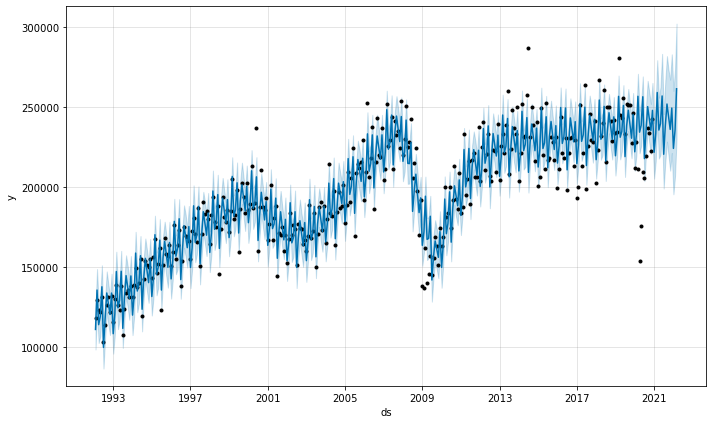

In [ ]:
fig1 = model_Prophet.plot(forecast)

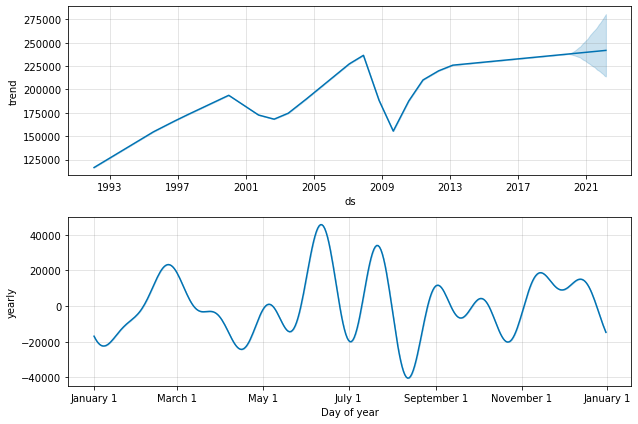

In [ ]:
fig2 = model_Prophet.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

<AxesSubplot:xlabel='date'>

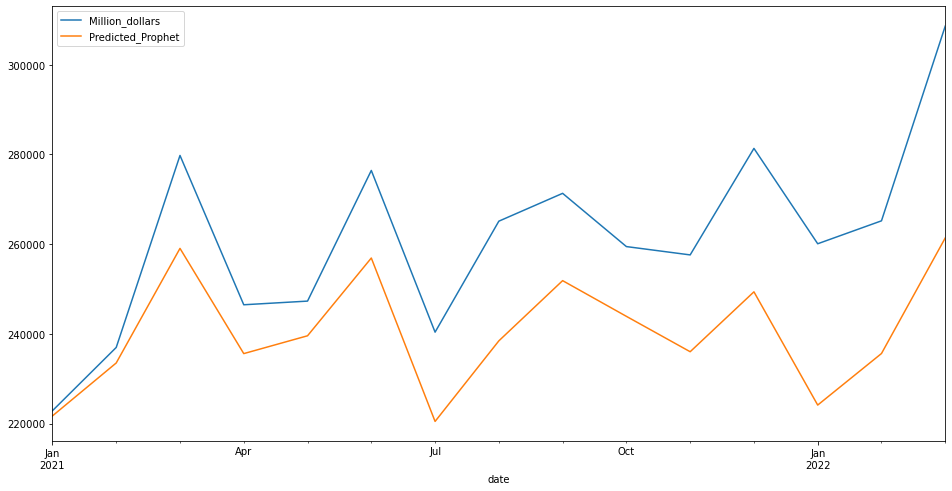

In [ ]:
test_data[[value_col, 'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 705771067.0678387
Mean Absolute Error is : 24063.724213187823
Root Mean Square Error is : 26566.352159599155
Mean Absolute Percentage Error is : 9.023518295742509
R2 score is : -0.6862116431768308

Weighted MAPE: 0.0921053424052838


In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 2037360966.60064
Mean Absolute Error is : 41280.860233397325
Root Mean Square Error is : 45137.13511733593
Mean Absolute Percentage Error is : 15.39373562065437
R2 score is : -3.867614930020628

Weighted MAPE: 0.15800495936942224


In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 1525353690.7903275
Mean Absolute Error is : 35299.25970206543
Root Mean Square Error is : 39055.776663514545
Mean Absolute Percentage Error is : 13.13040957253118
R2 score is : -2.6443391821928777

Weighted MAPE: 0.13511002589241636


In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 574220618.2264925
Mean Absolute Error is : 20754.60983275457
Root Mean Square Error is : 23962.90087252569
Mean Absolute Percentage Error is : 7.6998828513411635
R2 score is : -0.37191440310578905

Weighted MAPE: 0.07943950937096825


### Conclusion: 

From the WMAPE value, Prophet model gives the best prediction. 
Order of the models from best to worse: Prophet, ETS, SARIMAX, and ARIMA. 